# Random Forest 

## Introduction 
Decision trees left us with an issue of tree depth. Too much depth with lots of leaves results in overfitting but a <br/>
shallow leaf performs poorly since it is unable to capture as many distinctions in the raw data. we'll introduce **random forests** as a solution to some of these issues. 

Random forrest utilizes multiple trees, making its prediction by averaging perfictions of each component tree. This combined result is usually better than a single decision tree and works well with defaul parameters. Thought continuing to learn will allow better understanding with parameters and yeild better performance. **Note** that many of these parameters are very sensitive to chage. 

The general process the set up a random forest model looks like the following:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

## Optimization and Improvements
Random forrests have a number of parameters including n_estimators as well as max_depth. We could get optimize max_depth in the same way we optimized decision trees but to individually adjust each paramater would be highly tedious. To check the paramters within the **Random Forest** model we can run the following code: 

In [ ]:
print(forest_model.get_params())

### Hyperparameter Tuning 
We've already actually learned different hyperparameters already, just not by name. These are just parameters which are set by the data scientist - yes, you - before training. *Parameters* are things that are learnt in training. 
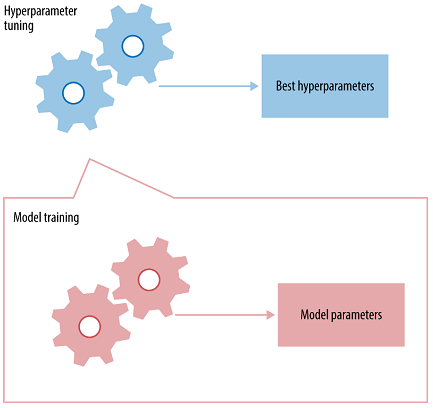

The better you are at hyperparamter tunning, the better position your model is in to get the best results when fitting.

#### A Few Parameters to Note
A few paramaters which are important are the following and it will be useful to remember their purpose:
- n_estimators = number of trees in the forest 
- max_features = max number of features considered for splitting a node 
- max_depth = max number of levels in each decision tree 
- min_samples_split = min number of datapoints place in a node before the node is split 
- min_samples_leaf = min number of datapoints allowed in a leaf noode 
- bootstrap = method for sampling data point (with or without replacement)

#### Problems with Hyperparameter Tunning - Introducing Cross Validaiton 
If we optimize the model for training data so much so, we will run into **overfitting**. We account for this through cross validation. One common method of this practice is **K-Fold CV**. Whenever we approach a machine learning proble, we split our data into a training and testing set. In K-Fold CV, we further split our training set into K number of subsets, called folds<br/>
We can then itteratively fit the model K times, each time training the data on K-1 of the folds and evaluating on the Kth fold. At the end, we average the performance on each fold to come up with final validation metrics.  
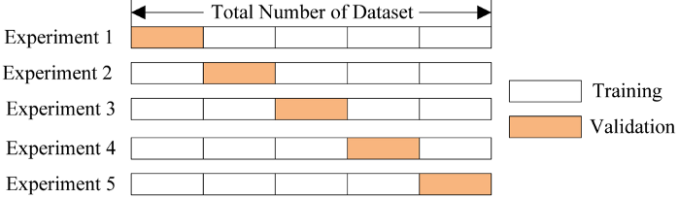
It looks incredibly tedious but **Scikit-Learn** provides an easy way via the RandomizedSearchCV method.

## Implementing RandomizedSearchCV 
First we need to create a parameter grid to sample from during the fitting and the process appears as follows. 

In [2]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

**Note** that we arn't trying every combination but rather *randomly* sampling a wide range of values from the grid we've created. With that being said, we can now train a model using RandomizedSearchCV in the same way we would train anything else. 

In [ ]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, with a random forest estimator using 3 fold cross validation, search across 100 different 
# combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(train_features, train_labels)

From this method, we can narrow the range of values for each hyperparameter. Determining if a random search yielded a better model can be done by comparing it with the base model. From here we can also check the best parameters and go back and itteratively refine our ranges for the random grid. 

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

rf_random.best_params_ # Outputs the best parameters found 

best_random = rf_random.best_estimator_ # Assigns the best estimator to an independent model 
random_accuracy = evaluate(best_random, test_features, test_labels)